https://realpython.com/linear-regression-in-python/

# Simple Linear Regression With scikit-learn

In [89]:
# imports, Python packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

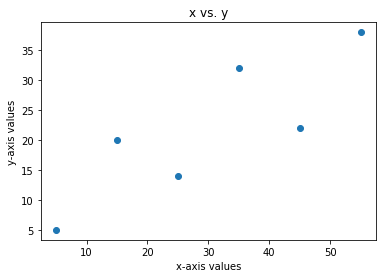

x shape is:  (6, 1)
[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
y shape is:  (6,)
[ 5 20 14 32 22 38]


In [90]:
#
# provide data
#

# data, real
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
# Now, you have two arrays: the input x and output y. 
# You should call .reshape() on x because this array is
# required to be two-dimensional, or to be more precise, 
# to have one column and as many rows as necessary. 
# That’s exactly what the argument (-1, 1) of .reshape() specifies.

# create a scatterplot, x and y data
plt.scatter(x, y)

plt.title("x vs. y")
plt.xlabel("x-axis values")
plt.ylabel("y-axis values")
plt.show()

print('x shape is: ', x.shape)
print('x looks like: ', x, sep='\r')

print('y shape is: ', y.shape)
print('y looks like: ', y, sep='\r')

In [91]:
#
# create a model and fit it
#

# create an instance of the class LinearRegression, which will represent the regression model
#model = LinearRegression()
# fit
#model.fit(x, y)

# same than the previous two statements
model = LinearRegression(n_jobs=-1).fit(x, y)


#
# Get results
#

# When you’re applying .score(), the arguments are also the 
# predictor x and regressor y, and the return value is 𝑅².
r_sq = model.score(x, y)
print('coefficient of determination:', round(r_sq, 2))

# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ 
# and .coef_, which represents 𝑏₁:
print('intercept:', round(model.intercept_, 2))
print('slope:', model.coef_)

coefficient of determination: 0.72
intercept: 5.63
slope: [0.54]


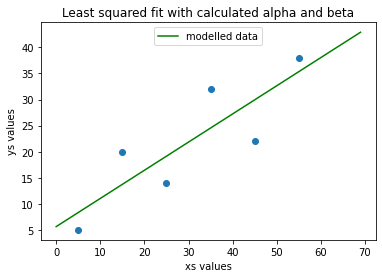

predicted response, using sklearn method &quot;predict&quot;:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response, using b_0 and b_1:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [92]:
#
# graph the model side to side with the real data
#
b_0 = model.intercept_
b_1 = model.coef_[0]

xs = [x_i for x_i in range(70)]
ys = [b_0 + b_1 * x_i for x_i in xs]


# create a scatterplot, x and y data
plt.scatter(x, y)
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(xs, ys, 'g-', label='modelled data')          # green solid line

# labels, title and show
plt.legend(loc=9)       # loc=9 means "upper centre"
plt.xlabel("xs values")
plt.ylabel("ys values")
plt.title("Least squared fit with calculated alpha and beta")
plt.show()

# using the sklearn model method
y_pred = model.predict(x)
print('predicted response, using sklearn method "predict":', y_pred, sep='\n')
# is the same than:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response, using b_0 and b_1:', y_pred, sep='\n')


# Multiple Linear Regression With scikit-learn

If there are just two independent variables, the estimated regression function is

𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂.

It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close as possible to the actual responses and yield the minimal SSR.

The case of more than two independent variables is similar, but more general. The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

In [100]:
# imports, Python packages
import numpy as np
from sklearn.linear_model import LinearRegression
# https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
from mpl_toolkits.mplot3d import Axes3D

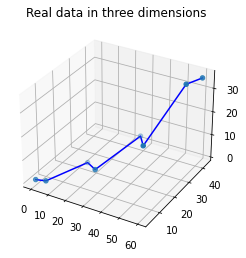

x has this number of elements:  8
x looks like:  [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y has this number of elements:  8
y looks like:  [4, 5, 20, 14, 32, 22, 38, 43]


In [127]:
#
# Provide data and inspect data
#

# Real data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

# Let's see how the real data looks like
# x, y, z axis values
rx, rz = zip(*x)        # unpack, unzip x into two separate sets
rx = list(rx)           # x-axis values
rz = list(rz)           # z-axis values
ry = y                  # y-axis values

# Lay the base for a 3D graph 
ax = plt.axes(projection='3d')

# generate scatter plot in 3D
ax.scatter3D(rx, ry, rz)

# generate a plot line with the real data
ax.plot3D(rx, ry, rz, 'blue')

# labels, title and show
plt.title("Real data in three dimensions")
plt.show()


print('x has this number of elements: ', len(x))
print('x looks like: ', x)
print('y has this number of elements: ', len(y))
print('y looks like: ', y)


In [105]:
#
# create a model and fit it
#

# create the regression model as an instance of LinearRegression and fit it
model = LinearRegression(n_jobs=-1).fit(x, y)


#
# Get results
#

# When you’re applying .score(), the arguments are also the 
# predictor x and regressor y, and the return value is 𝑅².
r_sq = model.score(x, y)
print('coefficient of determination:', round(r_sq, 2))

# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ 
# and .coef_, which represents 𝑏₁:
print('intercept:', round(model.intercept_, 2))
print('slope:', model.coef_)


coefficient of determination: 0.86
intercept: 5.52
slope: [0.44706965 0.25502548]


real response:
[4, 5, 20, 14, 32, 22, 38, 43]
estimated response with b_0, b_1 and b_2:
[5.777604756511893, 8.012953001132505, 12.738674971687429, 17.974447904869763, 23.975297281993207, 29.46609569648924, 38.78227633069083, 41.27265005662514]
predicted response by model:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


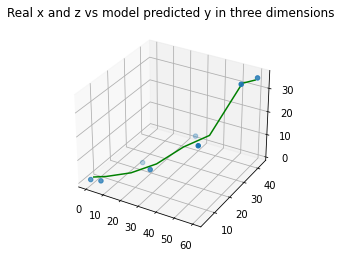

x has this number of elements:  8
x looks like:  [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y, real, has this number of elements:  8
y, real, looks like:  [4, 5, 20, 14, 32, 22, 38, 43]
y, predicted, has this number of elements:  8
y, predicted, looks like:  [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [132]:
# 
# predicted
#
b_0 = model.intercept_
b_1 = model.coef_[0]
b_2 = model.coef_[1]

# real y
ry = y
print('real response:', ry, sep='\n')
# estimated y
ey = [b_0 + x_1 * b_1 + x_2 * b_2 for x_1, x_2 in x]
print('estimated response with b_0, b_1 and b_2:', ey, sep='\n')
# predicted y
y_pred = model.predict(x)
print('predicted response by model:', y_pred, sep='\n')

# Lay the base for a 3D graph 
ax = plt.axes(projection='3d')

# generate scatter plot in 3D with the real data
ax.scatter3D(rx, ry, rz)

# generate a plot line with the real data
#ax.plot3D(rx, ry, rz, 'blue')

# # generate a plot line with the predicted response by the model
#ax.plot3D(rx, y_pred, rz, 'orange')

# generate a plot line with the estimated response with b_0, b_1 and b_2
ax.plot3D(rx, ey, rz, 'green')


# labels, title and show
plt.title("Real x and z vs model predicted y in three dimensions")
plt.show()


print('x has this number of elements: ', len(x))
print('x looks like: ', x)
print('y, real, has this number of elements: ', len(ry))
print('y, real, looks like: ', ry)
print('y, predicted, has this number of elements: ', len(y_pred))
print('y, predicted, looks like: ', y_pred)


# Polynomial Regression With scikit-learn


In [154]:
# imports, Python packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
from mpl_toolkits.mplot3d import Axes3D

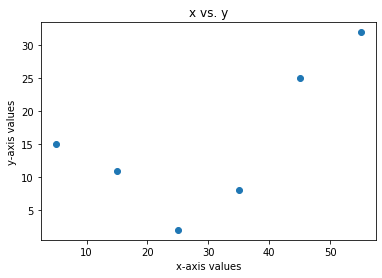

x shape is:  (6, 1)
x looks like:  [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
y shape is:  (6,)
y looks like:  [15 11  2  8 25 32]


In [155]:
#
# Provide data
# 

# real data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
# Keep in mind that you need the input to be a two-dimensional array.
# That’s why .reshape() is used.

# Let's see how the real data looks like
rx = x          # x-axis values
ry = y          # y-axis values

# create a scatterplot, with the real x and y data
plt.scatter(rx, ry)

plt.title("x vs. y")
plt.xlabel("x-axis values")
plt.ylabel("y-axis values")
plt.show()

print('x shape is: ', x.shape)
print('x looks like: ', x)

print('y shape is: ', y.shape)
print('y looks like: ', y)



## Transform input data

This is the new step you need to implement for polynomial regression!

As you’ve seen earlier, you need to include 𝑥² (and perhaps other terms) as additional features when implementing polynomial regression. For that reason, you should transform the input array x to contain the additional column(s) with the values of 𝑥² (and eventually more features).

It’s possible to transform the input array in several ways (like using insert() from numpy), but the class PolynomialFeatures is very convenient for this purpose. Let’s create an instance of this class:

In [156]:
#
# Transform input data
#
#transformer = PolynomialFeatures(degree=2, include_bias=False)
#transformer.fit(x)      # fit the model

# Once transformer is fitted, it’s ready to create a new, modified input. 
# You apply .transform() to do that:
#x_ = transformer.transform(x)

# You can also use .fit_transform() to replace the three previous statements with only one:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)


print('x looks like: ', x)
print('y looks like: ', y)
# The modified input array contains two columns: 
# one with the original inputs and the other with their squares.
print('modified x looks like: ', x_)   #  This is how the new input array looks

x looks like:  [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
y looks like:  [15 11  2  8 25 32]
modified x looks like:  [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [157]:
#
# create model and fit
#

model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)


coefficient of determination: 0.8908516262498563
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


real response:
[15 11  2  8 25 32]
estimated response with b_0, b_1 and b_2
[15.464285714285726, 7.907142857142866, 6.028571428571439, 9.82857142857143, 19.307142857142857, 34.46428571428571]
predicted response by model:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


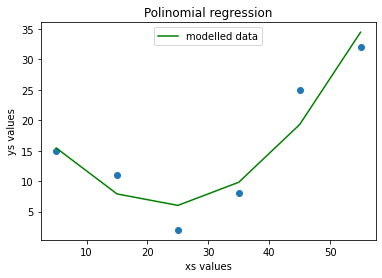

x has this number of elements:  6
x looks like:  [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
y, real, has this number of elements:  6
y, real, looks like:  [15 11  2  8 25 32]
y, predicted, has this number of elements:  6
y, predicted, looks like:  [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [158]:
# 
# predicted
#
b_0 = model.intercept_
b_1 = model.coef_[0]
b_2 = model.coef_[1]

# real y
ry = y
print('real response:', ry, sep='\n')
# estimated y
ey = [b_0 + x[0] * b_1 + x[0] * x[0] * b_2 for x in x]
print('estimated response with b_0, b_1 and b_2', ey, sep='\n')
# predicted y
y_pred = model.predict(x_)
print('predicted response by model:', y_pred, sep='\n')

# create a scatterplot, x and y data
plt.scatter(x, y)
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(x, y_pred, 'g-', label='modelled data')          # green solid line

# labels, title and show
plt.legend(loc=9)       # loc=9 means "upper centre"
plt.xlabel("xs values")
plt.ylabel("ys values")
plt.title("Polinomial regression")
plt.show()


print('x has this number of elements: ', len(x))
print('x looks like: ', x)
print('y, real, has this number of elements: ', len(ry))
print('y, real, looks like: ', ry)
print('y, predicted, has this number of elements: ', len(y_pred))
print('y, predicted, looks like: ', y_pred)
